## Data science for finance

In [67]:
# iconic trio for data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import get_quandl_api_key, get_news_api_key

%matplotlib inline

# python module for quandl, a financial data provider
import quandl

# python module for News API
from newsapi import NewsApiClient

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams['font.size'] = 22

The first example I wanted to take is Facebook. Facebook has been knowing difficult times, especially with the Cambridge Analytica scandal. Mark Zuckerberg had to defend himself against the Congress and the European Parliament. It obviously didn't send good vibes to the shareholders. Let's see the influence that the media have on the fall of Facebook.

To do so, we'll use the Quandl API to get financial data and the News API for press articles from all over the world.
To reproduce this analysis you need to create your own account on both sites in order to get an API key. No worries, it's free!

In [5]:
# set up the Quandl connection
quandl_api_key = get_quandl_api_key()
quandl.ApiConfig.api_key = quandl_api_key
quandl_code = "SSE/FB2A"

# get the data from the API, only get stock prices from the beginning of 2018 to the current date
facebook_data = quandl.get(quandl_code, start_date='2018-01-01', end_date='2018-10-30')

In [6]:
# display the last five rows to have a better idea of the data
facebook_data.tail(5)

,High,Low,Last,Previous Day Price,Volume
Date,,,,,
2018-10-24,135.90,127.74,127.74,134.46,845.0
2018-10-25,132.98,128.22,132.98,127.74,2990.0
2018-10-26,130.00,127.02,129.18,132.98,2703.0
2018-10-29,130.52,123.84,124.35,129.18,4629.0
2018-10-30,131.58,121.61,131.58,124.35,2444.0


(0, 190.1275)

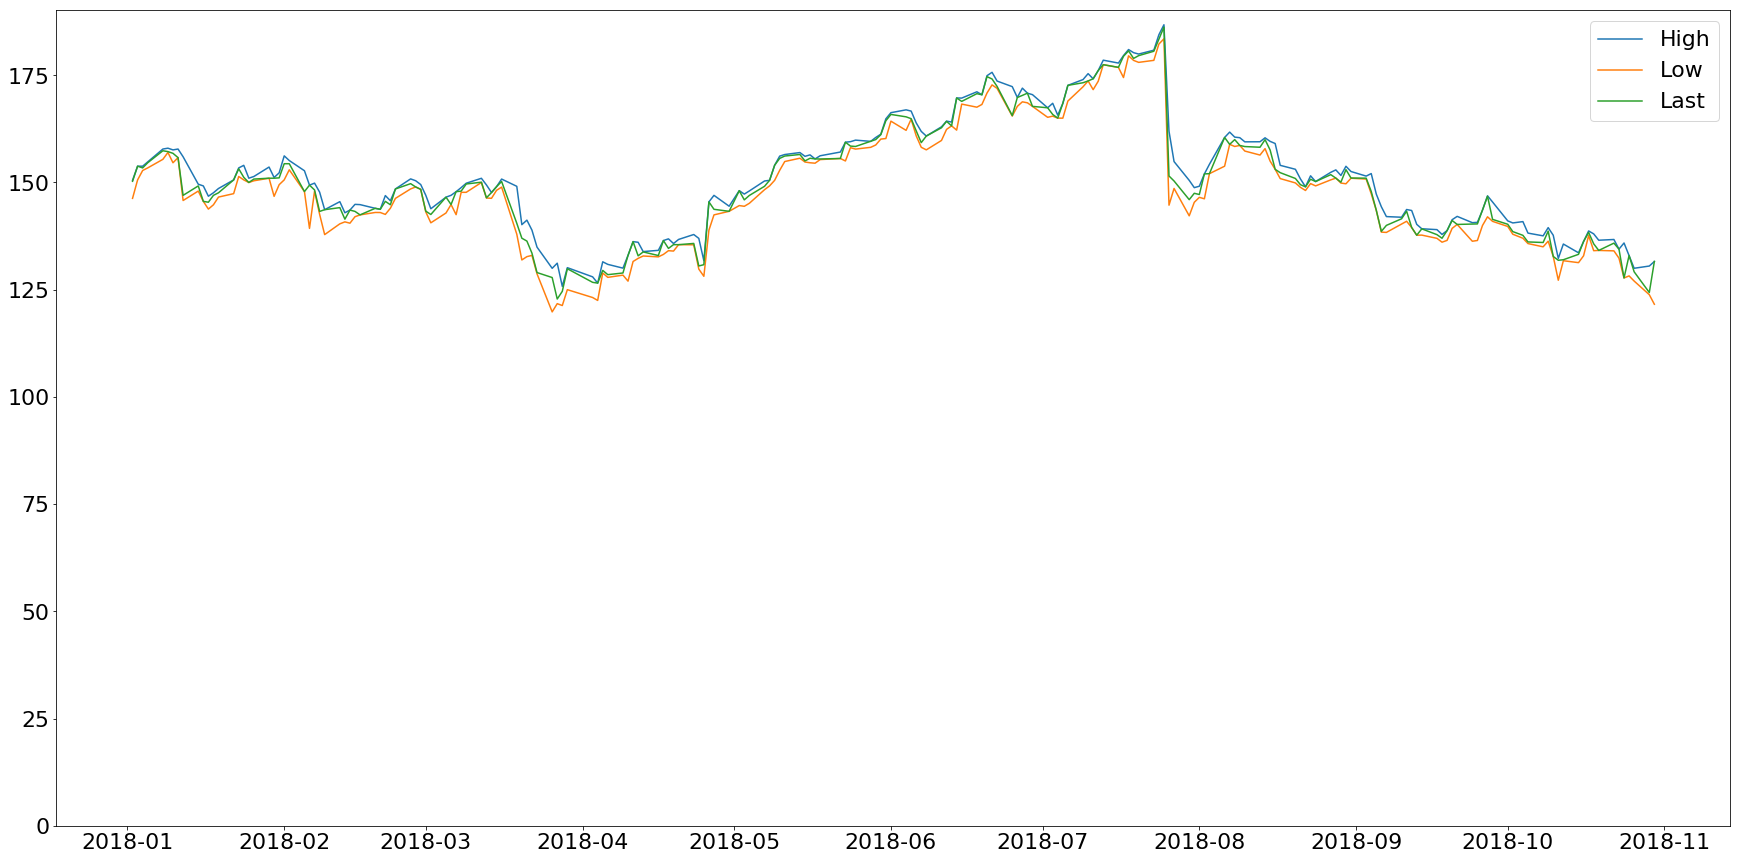

In [34]:
plt.plot(facebook_data['High'], label='High')
plt.plot(facebook_data['Low'], label='Low')
plt.plot(facebook_data['Last'], label='Last')
plt.legend()
plt.ylim(bottom=0)
plt.title('Evolution of the Facebook\'s stock price during the 10 first months of 2018')

In [40]:
facebook_data['Last'].corr(facebook_data['Low'])

0.9907669742586274

In [41]:
facebook_data['Last'].corr(facebook_data['High'])

0.9906183244878256

Graphically we clearly see that the 'High', 'Low' and 'Last' columns are correlated! And we have a high Pearson correlation coefficient (the closer to one, the stronger the relationship). So in the next sections, we'll use the 'Last' column, which makes sense because it gives us a daily picture of the stock price.

Now we have the data, we want to get some insights. What is interesting when we analyze financial data is to understand why the stock price increases or why it decresases. But first we need an extra column that compares the 'last' and 'previous day price' columns. This is a good indicator of what happened during the session.

In [24]:
facebook_data['Variation'] = facebook_data['Last'] - facebook_data['Previous Day Price']
facebook_data['% Variation'] = round((facebook_data['Last'] - facebook_data['Previous Day Price']) / facebook_data['Previous Day Price'], 2)

Text(0.5,1,"Facebook's stock price daily variation")

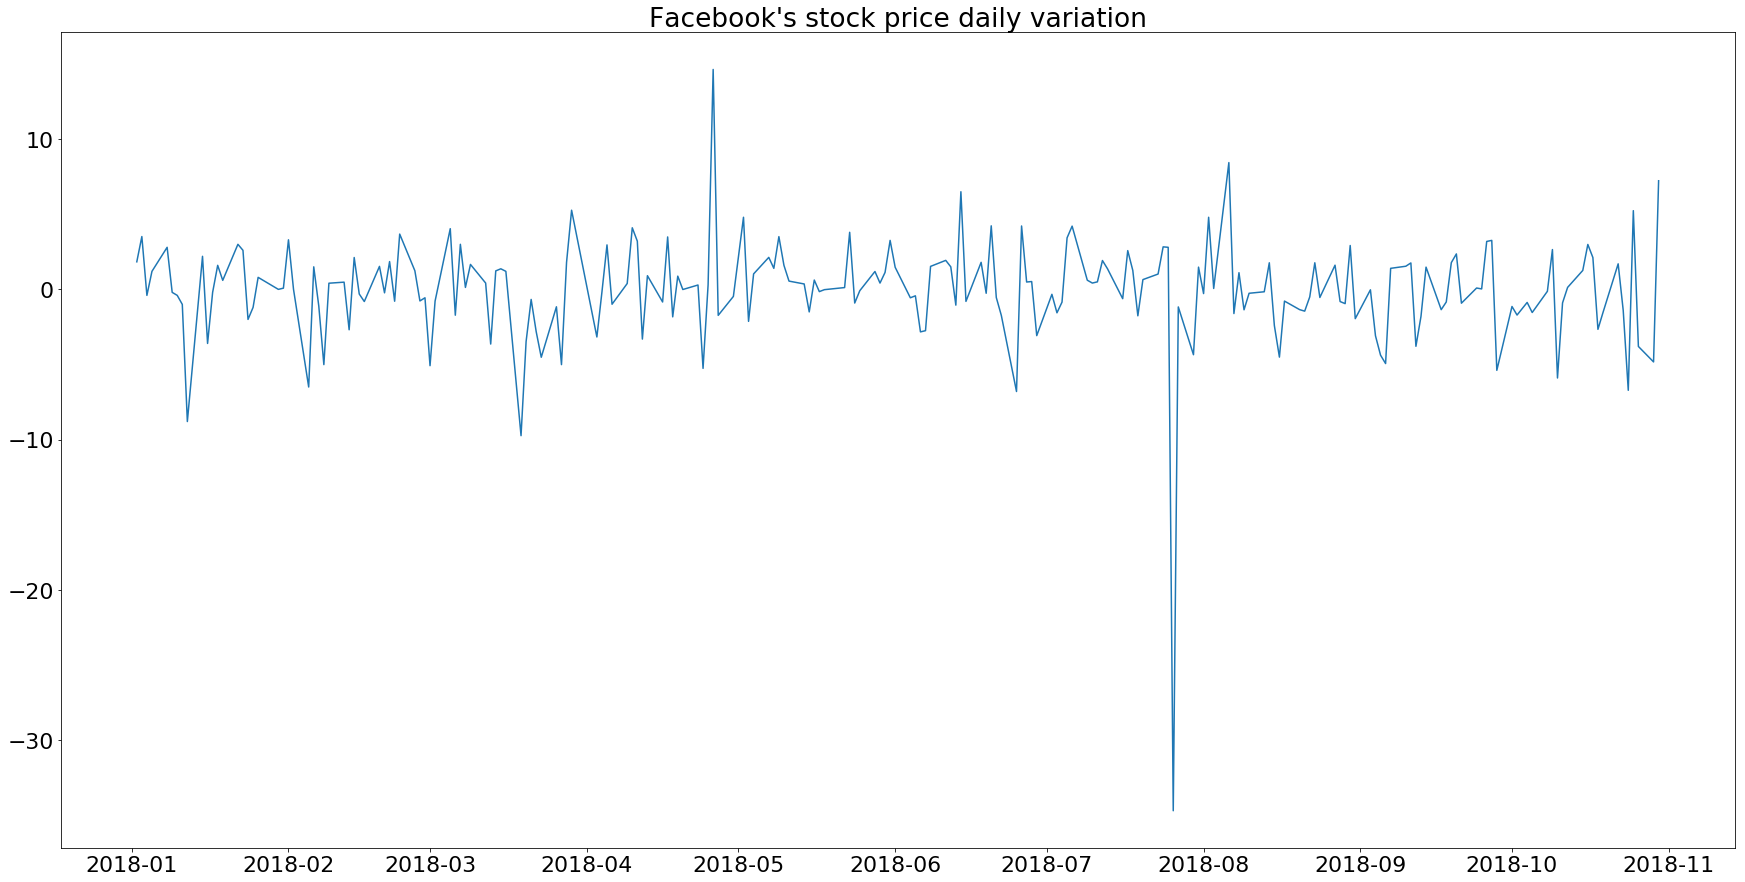

In [47]:
plt.plot(facebook_data['Variation'])
plt.title('Facebook\'s stock price daily variation')

We see that the Facebook stock price is not stable. There has been gig ups and downs. It has fallen by more than 30 euros in one day for example.

## Are news correlated with stock prices?

Through the example of Facebook, we want to highlight the link between the news and stock prices. This is quite obvious but it could be interesting to know if there is a kind of delay between stock prices evolutions and publications in the news.

Sadly, I can get data from a month maximum, so I can't explain the big falls in August and when the Cambridge Analytica scandal came out but my code is ready if something new happens.

In [71]:
# create an instance of a News Api Client
newsapi_key = get_news_api_key()
api = NewsApiClient(api_key=newsapi_key)

In [72]:
# get all articles for a month about Facebook
facebook_news = api.get_everything(q='facebook', language='en')

In [74]:
# get all the article titles
titles = ''
for article in facebook_news['articles']:
    titles += article['title'] + ' '

(-0.5, 399.5, 199.5, -0.5)

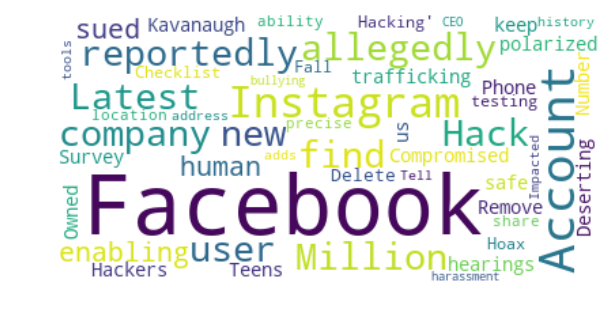

In [85]:
# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=50).generate(titles)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

I chose bilinear interpolation. For further detail, check  [here](https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html).

Of course there is the word Facebook. But there are bad words linked to the recent hack like 'Hacking', 'Compromised' or 'Account'. Another interesting word is 'Instagram', which seems to be closely related to Facebook.

I would have loved to be able to determine the **sentiment** behind each title but the libraries are not really good at getting the meaning of headlines. For example, try the sentence 'Facebook sued for allegedly enabling human trafficking' with the demo right [here](https://text-processing.com/demo/sentiment/). It is quite explicite isn't it? But you'll see that it seems to be *positive* when you give it to the library. 